In [1]:
import numpy as np
import pandas as pd
import os

,Datetime,Open,High,Low,Close,Adj Close,Volume
7560,2020-03-05 09:00:00+01:00,179.259995,179.539993,179.000000,179.380005,179.380005,0
7561,2020-03-05 09:01:00+01:00,179.119995,179.320007,179.100006,179.320007,179.320007,6605
7562,2020-03-05 09:02:00+01:00,179.100006,179.100006,178.660004,178.880005,178.880005,12437
7563,2020-03-05 09:03:00+01:00,178.940002,178.940002,178.600006,178.600006,178.600006,1671
7564,2020-03-05 09:04:00+01:00,178.779999,178.820007,178.500000,178.820007,178.820007,12850


In [23]:
for i in os.listdir('data/'):
    df = pd.read_csv('data/HM-B.ST_1m.csv')
    df["Datetime"] = pd.to_datetime(df["Datetime"])
    df = df.sort_values('Datetime')
    df = df.reset_index(drop=True)
    df.to_csv('sorted_data/'+i, index=False)
    print('Done for ' + i)

Done for ABB.ST_30m.csv
Done for SAND.ST_1m.csv
Done for SAND.ST_15m.csv
Done for ABB.ST_1m.csv
Done for HM-B.ST_90m.csv
Done for ATCO-B.ST_30m.csv
Done for ^OMX_2m.csv
Done for ICA.ST_90m.csv
Done for ^OMXC25_90m.csv
Done for ASSA-B.ST_2m.csv
Done for ^OMXHPI_5m.csv
Done for ERIC-B.ST_15m.csv
Done for ELUX-B.ST_15m.csv
Done for ELUX-B.ST_5m.csv
Done for ^OMX_90m.csv
Done for ATCO-B.ST_5m.csv
Done for ^OMXC20_2m.csv
Done for ^OMXC25_1m.csv
Done for ^OMXH25_90m.csv
Done for HM-B.ST_1m.csv
Done for ^OMXC20_30m.csv
Done for ICA.ST_2m.csv
Done for ^OMXH25_1m.csv
Done for ASSA-B.ST_60m.csv
Done for ^OMXSPI_60m.csv
Done for ^OMXHPI_15m.csv
Done for ^OMX_15m.csv
Done for ^OMXC20_5m.csv
Done for ERIC-B.ST_90m.csv
Done for ELUX-B.ST_90m.csv
Done for ATCO-B.ST_2m.csv
Done for ^OMXH25_15m.csv
Done for ELUX-B.ST_2m.csv
Done for ASSA-B.ST_30m.csv
Done for ICA.ST_5m.csv
Done for ^OMXSPI_30m.csv
Done for ^OMXC20_60m.csv
Done for ^OMXHPI_90m.csv
Done for ^OMX_5m.csv
Done for ATCO-B.ST_60m.csv
Done for

In [5]:
hm = pd.read_csv('data/HM-B.ST_1m.csv')
hm["Datetime"] = pd.to_datetime(hm["Datetime"])
#hm = hm.set_index('Datetime')
hm.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-03-26 09:00:00+01:00,130.399994,130.860001,129.979996,130.860001,130.860001,0
1,2020-03-26 09:01:00+01:00,130.820007,131.779999,129.860001,129.860001,129.860001,37317
2,2020-03-26 09:02:00+01:00,129.820007,130.179993,128.580002,129.580002,129.580002,18178
3,2020-03-26 09:03:00+01:00,129.619995,130.419998,129.559998,130.039993,130.039993,13635
4,2020-03-26 09:04:00+01:00,130.419998,130.419998,129.179993,129.179993,129.179993,37434


In [7]:
hm = hm.sort_values('Datetime')
hm.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
7560,2020-03-05 09:00:00+01:00,179.259995,179.539993,179.000000,179.380005,179.380005,0
7561,2020-03-05 09:01:00+01:00,179.119995,179.320007,179.100006,179.320007,179.320007,6605
7562,2020-03-05 09:02:00+01:00,179.100006,179.100006,178.660004,178.880005,178.880005,12437
7563,2020-03-05 09:03:00+01:00,178.940002,178.940002,178.600006,178.600006,178.600006,1671
7564,2020-03-05 09:04:00+01:00,178.779999,178.820007,178.500000,178.820007,178.820007,12850


In [78]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import re 
import argparse
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import CSVLogger
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras import optimizers

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})
from tqdm import tqdm_notebook

def normalize_data(minutedata):
    #train_cols = ["Open","High","Low","Close","Volume"]
    train_cols = minutedata.columns[2:]
    df_train, df_test = train_test_split(minutedata, train_size=0.8, test_size=0.2, shuffle=False)
    print("Train and Test size are: ", len(df_train), " and ", len(df_test))
    
    # scale the feature MinMax, build array
    x = df_train.loc[:,train_cols].values
    min_max_scaler = MinMaxScaler()
    x_train = min_max_scaler.fit_transform(x)
    x_test = min_max_scaler.transform(df_test.loc[:,train_cols])
    return x_train, x_test, min_max_scaler

def build_timeseries(mat, num_steps, y_col_index, TIME_STEPS):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,num_steps))
    #print(y.shape)
    #print(mat[TIME_STEPS+1:TIME_STEPS+1+num_steps, y_col_index].reshape(1,num_steps).shape)
    
    for i in tqdm_notebook(range(dim_0-num_steps)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i:TIME_STEPS+i+num_steps, y_col_index].reshape(num_steps,)
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat
    
def build_lstm_model(train_data, BATCH_SIZE, TIME_STEPS):  
    model = Sequential()
    model.add(LSTM(90, batch_input_shape=(BATCH_SIZE, TIME_STEPS, train_data.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(5,activation='sigmoid'))
    optimizer = optimizers.RMSprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def compute_sq_error(lstm_model, x_test_data, y_test_data, BATCH_SIZE):
    y_pred = lstm_model.predict(trim_dataset(x_test_data, BATCH_SIZE), batch_size=BATCH_SIZE)
    y_pred_mean = y_pred.mean(axis=1)
    y_test_t = trim_dataset(y_test_data, BATCH_SIZE)
    y_test_t_mean = y_test_t.mean(axis=1)
    error = mean_squared_error(y_test_t_mean, y_pred_mean)
    return error

def plot_real_vs_pred(pred, real, outfile):
    plt.figure()
    plt.plot(pred)
    plt.plot(real)
    plt.title('Prediction vs Real Stock Price')
    plt.ylabel('Price (in SEK)')
    plt.xlabel('Minutes')
    plt.legend(['Prediction', 'Real'], loc='upper left')
    plt.savefig(outfile)   # save the figure to file
    #plt.close(fig)  

def read_sel_data(stock_name, interval = '1m', datadir = 'sorted_data/'):
    colnames = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    filename = datadir + stock_name + '_' + interval + '.csv'
    data = pd.read_csv(filename)
    cols = list(data.columns)[1:] 
    if colnames == cols:
        ll = list([stock_name+'_'+x for x in cols])
        cnames = ['Datetime'] + ll
        data.columns = cnames
    else:
        print('Columns are not in order')
    # select only the Adj Close and Volume
    if re.search('\^', stock_name) is None:
        data = data.iloc[:, [0,5,6]]
    else:
        data = data.iloc[:, [0,5]]
    
    return data

def get_full_data(stock_list):
    data_dic = dict()
    for i in stock_list:
        print('reading data for ' + i)
        data_dic[i] = read_sel_data(i)
    
    merged_df = data_dic[stock_list[0]]

    for i in range(1, len(stock_list)):
        merged_df = merged_df.merge(data_dic[stock_list[i]], on = 'Datetime')
    
    return merged_df

def arg_setting():
        now=datetime.now().strftime('%Y-%m-%d_%H-%M-%S')   
        outfigfile = 'figures/' + now + '_model_performance.png'
        parser = argparse.ArgumentParser(description='LSTM model to predict next 5 min stock prices')
        parser.add_argument(
            '-s',
            '--stockname',
            default='HM-B.SE',
            help='Stock name (string), default=\"HM-B.SE\"'
        )
        parser.add_argument(
            '-n',
            '--predlen',
            default='5',
            help='Number of steps to predict (int), default=5'
        )
        parser.add_argument(
            '-b',
            '--batchsize',
            default = '100',
            help = 'Batch size for the model (int), default=100'
        )

        parser.add_argument(
            '-t',
            '--timesteps',
            default='30',
            help='Time steps for the model (int), default=30'
        )
        
        parser.add_argument(
            '-l',
            '--logfile',
            default='log/'+now+'_model.log',
            help='Output file for storing logs (string), default=\"log/timestampped_lstm_model.log\"'
        )
        parser.add_argument(
            '-o',
            '--outplot',
            default='figures/' + now + '_model_performance.png',
            help='Output file for storing logs (string), default=\"log/timestampped_lstm_perf.png\"'
        )
        parser.add_argument(
            '-e',
            '--epochs',
            default='100',
            help='Number of epochs (int), default=100'
        )
        
        cmd_args = parser.parse_args()
        #print("Number of minutes to predict: ", cmd_args.predlen)
        stock_name = str(cmd_args.stockname)
        pred_len = int(cmd_args.predlen)
        batch_size = int(cmd_args.batchsize)
        timesteps = int(cmd_args.timesteps)
        logfile = str(cmd_args.logfile)
        outplot = str(cmd_args.outplot)
        epochs = int(cmd_args.epochs)

        return stock_name, pred_len, batch_size, timesteps, logfile, outplot, epochs

In [79]:
stock_name = 'HM-B.ST'
pred_len, batch_size, time_steps, log_file, out_plot, epochs = 5, 100, 60, '/tmp/hm.log', '/tmp/hm.png', 50

ind_list = list(['^OMXC20', '^OMXC25', '^OMXH25', '^OMXHPI', '^OMX'])
comp_list = list([stock_name]) + ind_list
stock_data = get_full_data(comp_list)
pred_col_id = 1
comp_list

reading data for HM-B.ST
reading data for ^OMXC20
reading data for ^OMXC25
reading data for ^OMXH25
reading data for ^OMXHPI
reading data for ^OMX


['HM-B.ST', '^OMXC20', '^OMXC25', '^OMXH25', '^OMXHPI', '^OMX']

In [80]:
stock_data.head()

,Datetime,HM-B.ST_Adj Close,HM-B.ST_Volume,^OMXC20_Adj Close,^OMXC25_Adj Close,^OMXH25_Adj Close,^OMXHPI_Adj Close,^OMX_Adj Close
0,2020-03-05 09:00:00+01:00,179.380005,0,179.380005,179.380005,179.380005,179.380005,179.380005
1,2020-03-05 09:01:00+01:00,179.320007,6605,179.320007,179.320007,179.320007,179.320007,179.320007
2,2020-03-05 09:02:00+01:00,178.880005,12437,178.880005,178.880005,178.880005,178.880005,178.880005
3,2020-03-05 09:03:00+01:00,178.600006,1671,178.600006,178.600006,178.600006,178.600006,178.600006
4,2020-03-05 09:04:00+01:00,178.820007,12850,178.820007,178.820007,178.820007,178.820007,178.820007


In [81]:
# normalize the stock data
x_train, x_test, min_max_scaler = normalize_data(stock_data)

### Training data
# build time-series
x_t, y_t = build_timeseries(x_train, pred_len, pred_col_id, time_steps)
# trim extra rows from training data
x_t = trim_dataset(x_t, batch_size)
y_t = trim_dataset(y_t, batch_size)

### Test data
x_temp, y_temp = build_timeseries(x_test, pred_len, pred_col_id, time_steps)
x_val, x_test_t = np.split(trim_dataset(x_temp, batch_size),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, batch_size),2)

Train and Test size are:  8052  and  2013



length of time-series i/o (7992, 60, 6) (7992, 5)



length of time-series i/o (1953, 60, 6) (1953, 5)


In [82]:
# build and run the LSTM model
csv_logger = CSVLogger(os.path.join(log_file), append=True)
lstm_model = build_lstm_model(x_t, batch_size, time_steps)
history = lstm_model.fit(x_t, y_t, epochs=50, verbose=2, batch_size=batch_size,
                    shuffle=False, validation_data=(trim_dataset(x_val, batch_size),
                    trim_dataset(y_val, batch_size)), callbacks=[csv_logger])


Train on 7900 samples, validate on 900 samples
Epoch 1/50
 - 5s - loss: 0.0199 - val_loss: 0.0081
Epoch 2/50
 - 4s - loss: 0.0215 - val_loss: 0.0076
Epoch 3/50
 - 4s - loss: 0.0137 - val_loss: 0.0060
Epoch 4/50
 - 4s - loss: 0.0099 - val_loss: 0.0056
Epoch 5/50
 - 4s - loss: 0.0069 - val_loss: 0.0052
Epoch 6/50
 - 4s - loss: 0.0050 - val_loss: 0.0051
Epoch 7/50
 - 4s - loss: 0.0043 - val_loss: 0.0044
Epoch 8/50
 - 4s - loss: 0.0040 - val_loss: 0.0040
Epoch 9/50
 - 4s - loss: 0.0037 - val_loss: 0.0036
Epoch 10/50
 - 4s - loss: 0.0034 - val_loss: 0.0034
Epoch 11/50
 - 4s - loss: 0.0031 - val_loss: 0.0027
Epoch 12/50
 - 4s - loss: 0.0029 - val_loss: 0.0023
Epoch 13/50
 - 4s - loss: 0.0026 - val_loss: 0.0022
Epoch 14/50
 - 4s - loss: 0.0026 - val_loss: 0.0021
Epoch 15/50
 - 4s - loss: 0.0025 - val_loss: 0.0017
Epoch 16/50
 - 4s - loss: 0.0021 - val_loss: 0.0016
Epoch 17/50
 - 4s - loss: 0.0019 - val_loss: 0.0014
Epoch 18/50
 - 4s - loss: 0.0019 - val_loss: 0.0015
Epoch 19/50
 - 4s - loss: 

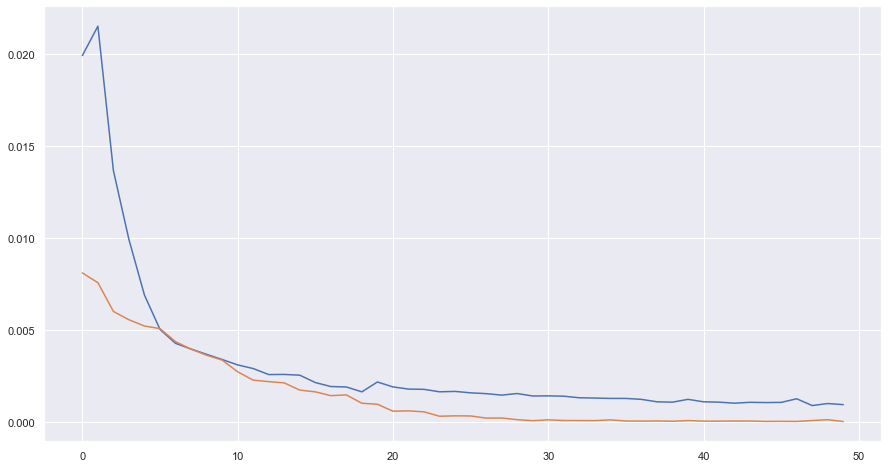

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [84]:
# compute model error
y_pred = lstm_model.predict(trim_dataset(x_test_t, batch_size), batch_size=batch_size)
y_pred_mean = y_pred.mean(axis=1)
#y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, batch_size)
y_test_t_mean = y_test_t.mean(axis=1)
error = mean_squared_error(y_test_t_mean, y_pred_mean)
print("Squared error of the model is", error)

Squared error of the model is 3.093257964782111e-05


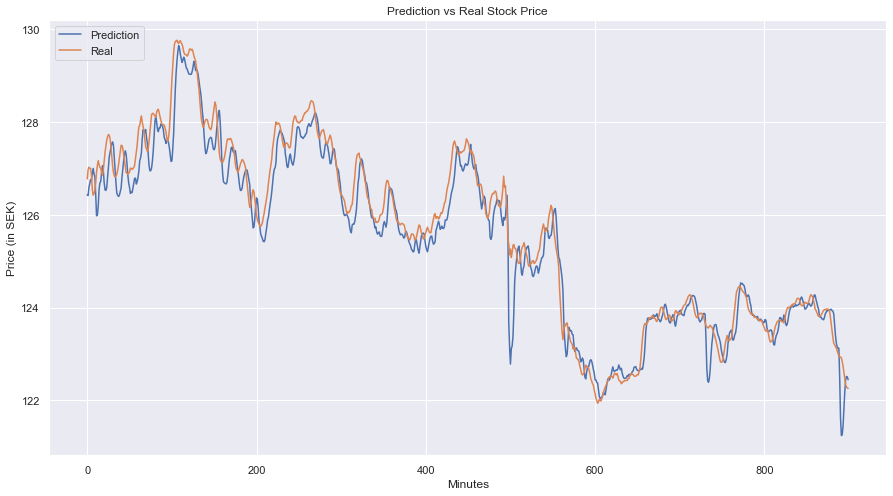

In [85]:
# de-normalize the prediction
y_pred_mean = y_pred.mean(axis=1)
y_pred_org = (y_pred_mean * min_max_scaler.data_range_[pred_col_id]) + min_max_scaler.data_min_[pred_col_id] 
y_test_t_org = (y_test_t_mean * min_max_scaler.data_range_[pred_col_id]) + min_max_scaler.data_min_[pred_col_id]

# plot the predicted vs real values
outfile = 'figures/TS_'+str(time_steps)+'_BS_'+str(batch_size)+'_Error_'+str(round(error,5))+'.png'
plot_real_vs_pred(y_pred_org, y_test_t_org, outfile)